# - **Objective**:

The objective of this project is to accurately predict the suitable drug outcomes for patients. To achieve this, we will perform various steps including dataset analysis, outlier detection, data distribution exploration, data preprocessing, model building using Support Vector Classifier (SVC), hyperparameter tuning, and implementing a user-friendly prediction function. The primary goal is to obtain a high accuracy score for the drug classification task.

# Data Decription

Age - Age of the Patient

Sex - Gender of the patients

BP - Blood Pressure Levels

Cholesterol - Cholesterol Levels

Na_to_K - Sodium to potassium Ration in Blood

Drug - Drug Type

## **Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv('/content/drug.csv')

In [3]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


## **Preprocessing**

In [4]:
df['Drug'].unique() # multi class to identify

array(['DrugY', 'drugC', 'drugX', 'drugA', 'drugB'], dtype=object)

In [5]:
df.shape

(200, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [7]:
df.isnull().sum()

,0
Age,0
Sex,0
BP,0
Cholesterol,0
Na_to_K,0
Drug,0


In [8]:
df.duplicated().sum()

np.int64(0)

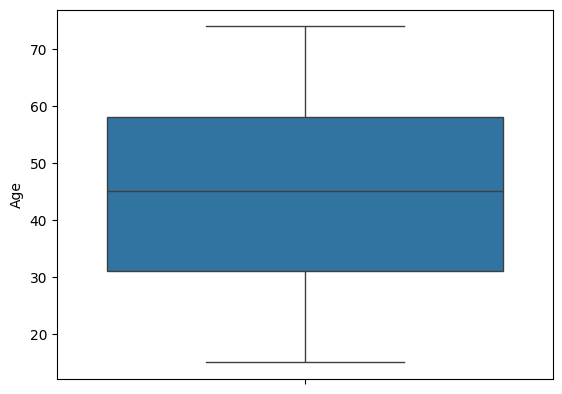

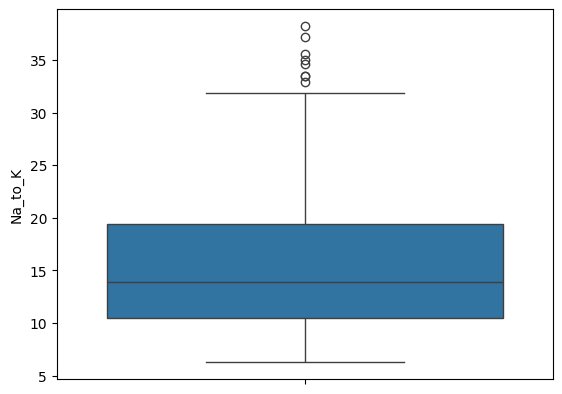

In [9]:
for col in df.columns:
  if df[col].dtypes != 'object':
    sns.boxplot(df[col])
    plt.show()

In [10]:
Q1 = df['Na_to_K'].quantile(0.25)
Q3 = df['Na_to_K'].quantile(0.75)

IQR = Q3 - Q1

LB = Q1 - IQR*(1.5)
UB = Q3 + IQR*(1.5)

df = df[(df['Na_to_K'] >= LB) & (df['Na_to_K'] <= UB)]

In [11]:
df.shape

(192, 6)

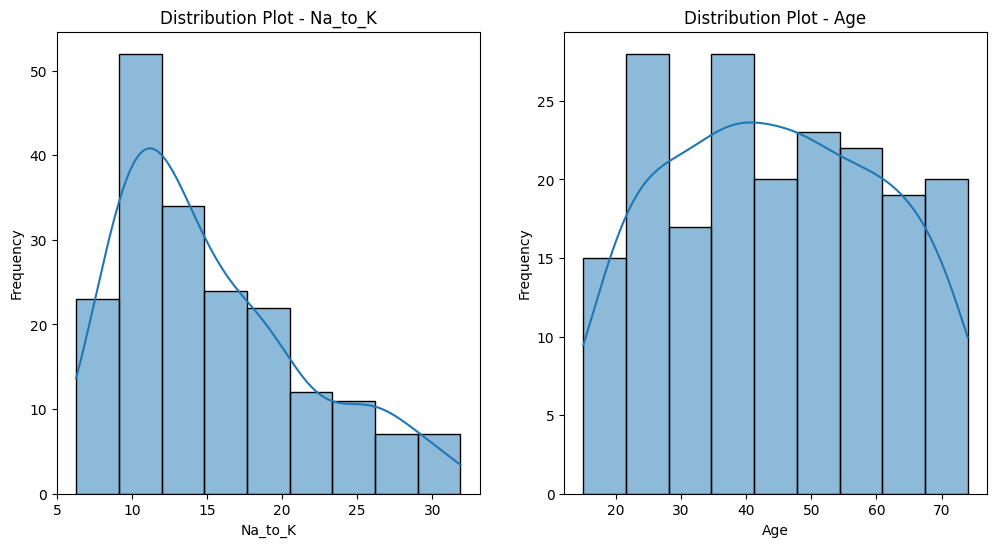

In [12]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot distribution of 'Na_to_K' column
sns.histplot(df['Na_to_K'], kde=True, ax=axes[0])
axes[0].set_title('Distribution Plot - Na_to_K')
axes[0].set_xlabel('Na_to_K')
axes[0].set_ylabel('Frequency')

# Plot distribution of 'Age' column
sns.histplot(df['Age'], kde=True, ax=axes[1])
axes[1].set_title('Distribution Plot - Age')
axes[1].set_xlabel('Age')
axes[1].set_ylabel('Frequency')

# Display the plots
plt.show()


insights for age:
- here we can see the data is not normally distributed
- Here we can see that our dataset contains more people with age between 20-30 and 35-40.

insights for Na_to_K:
- the data is right skewed
- we can collect here that na_to_k level mostly falls at the range of approximatly 7 to 15.


## **Data Engineering**
#### **Label Encoding**

In [13]:
le = LabelEncoder()
for col in df.columns:
  if df[col].dtypes == 'object':
    df[col] = le.fit_transform(df[col])

/tmp/ipython-input-13-697300732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-13-697300732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = le.fit_transform(df[col])
/tmp/ipython-input-13-697300732.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/us

In [14]:
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0
...,...,...,...,...,...,...
195,56,0,1,0,11.567,3
196,16,1,1,0,12.006,3
197,52,1,2,0,9.894,4
198,23,1,2,1,14.020,4


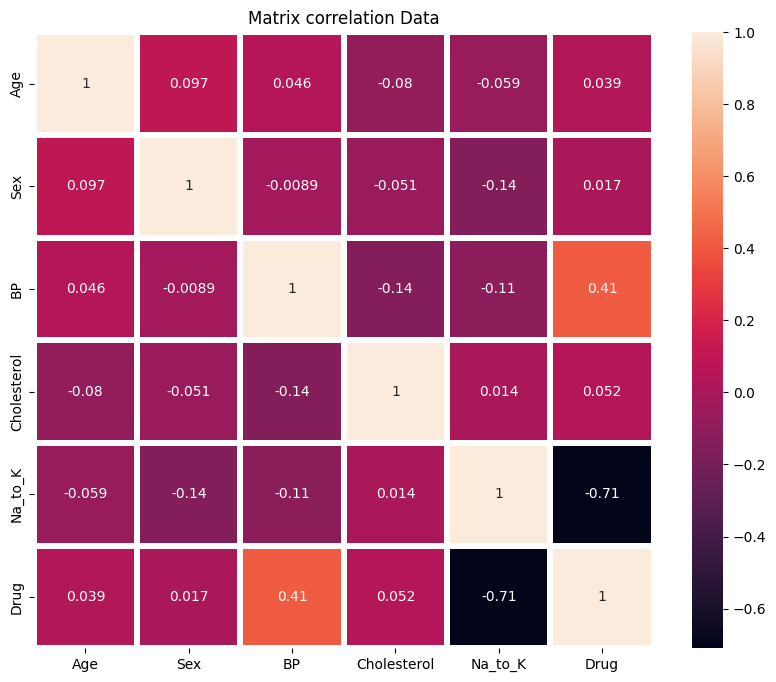

<Figure size 640x480 with 0 Axes>

In [15]:
plt.figure(figsize=(10,8))
plt.title('Matrix correlation Data')
sns.heatmap(df.corr(),annot=True,linewidths=3)
plt.show()
plt.savefig('Matrix correlation Data')
#Plotting the correlation matrix of the dataframe to visualize the relationships between variables.

from the above matrix we can see that the
- target column Drug has very bad co-relation with Na_to_K column with -0.69(negetive)
- and the best co-relation with BP column with 0.42 as the corelation(positive)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 192 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          192 non-null    int64  
 1   Sex          192 non-null    int64  
 2   BP           192 non-null    int64  
 3   Cholesterol  192 non-null    int64  
 4   Na_to_K      192 non-null    float64
 5   Drug         192 non-null    int64  
dtypes: float64(1), int64(5)
memory usage: 10.5 KB


## **Model Building**

In [17]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [18]:
X

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043
...,...,...,...,...,...
195,56,0,1,0,11.567
196,16,1,1,0,12.006
197,52,1,2,0,9.894
198,23,1,2,1,14.020


In [19]:
y

,Drug
0,0
1,3
2,3
3,4
4,0
...,...
195,3
196,3
197,4
198,4


In [20]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=33)

SVM

In [21]:
from sklearn.svm import SVC

In [22]:
model = SVC(gamma='scale')

In [23]:
model.fit(X_train,y_train)

SVC()

In [24]:
y_pred = model.predict(X_test)

#### **Accuracy Score**

In [25]:
accuracy_score(y_pred, y_test)*100

74.35897435897436

## **Hyperparameter Tuning**

In [26]:
from sklearn.model_selection import GridSearchCV

In [27]:
SVC().get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [28]:
param_grid = {
    'C' : [1, 5, 10, 50, 100],
    'gamma' : [0.1, 0.01, 20, 60, 100]
}

- 'C' controls the balance between simplicity and accuracy of the model
- 'gamma' controls the flexibility and complexity of the decision boundary.

In [29]:
best_model = GridSearchCV(SVC(), param_grid, cv=5, refit=True)

In [30]:
best_model.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1, 5, 10, 50, 100],
                         'gamma': [0.1, 0.01, 20, 60, 100]})

In [31]:
best_model.best_estimator_

SVC(C=100, gamma=0.01)

In [32]:
best_y_pred = best_model.predict(X_test)

#### **Best accuracy score**

In [33]:
accuracy_score(best_y_pred, y_test)*100

92.3076923076923